In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [61]:
car_path = os.path.abspath(os.path.join(os.path.dirname("__file__"),'..', 'users'))
file_path = os.path.join(car_path, 'registro_partidas.csv')
datos = pd.read_csv(file_path)

In [62]:
def level_graphic():
    """ Porcentaje de partidas por nivel. """
    
    plt.clf()

    facil = datos[(datos['estado'] == 'finalizada') & (datos['nivel'] == 'Facil')]['nivel'].count()
    normal = datos[(datos['estado'] == 'finalizada') & (datos['nivel'] == 'Normal')]['nivel'].count()
    dificil = datos[(datos['estado'] == 'finalizada') & (datos['nivel'] == 'Dificil')]['nivel'].count()
    
    data_dibujo = [facil, normal, dificil]
    etiquetas = ['Facil', 'Normal', 'Dificil']
    plt.pie(data_dibujo, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=1.1)
    plt.legend(etiquetas)
    plt.title('Porcentaje de partidas finalizadas por dificultad')
    plt.show()

In [63]:
def partidas_estado():
    """Gráfico que muestre el porcentaje de partidas por estado (fin, cancelada, error, timeout).
        También debe tener en cuenta las partidas que se terminaron inesperadamente o de forma repentina
        (partidas sin evento de fin)"""

    datos = pd.read_csv(file_path)

    fin = datos[(datos['estado']) == 'finalizada']['estado'].count()
    #cierre por falla -> error
    #col_estado = datos.loc['estado']
    #cant_error =

    error = datos[(datos['estado']) == 'error']['estado'].count()
    timeout = datos[(datos['estado']) == 'timeout']['estado'].count()
    cancelada = datos[(datos['estado']) == 'cancelada']['estado'].count()

    data_graf = [fin, error, timeout, cancelada]
    etiquetas = ['fin', 'error', 'timeout', 'cancelada']
    plt.pie(data_graf, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=1.1)
    plt.legend(etiquetas)
    plt.title('Porcentaje de partidas por estado')
    plt.show()

In [64]:
def porcentaje_finalizado_genero():
    """Gráfico que muestre el porcentaje de partidas finalizadas por género"""
    

    plt.clf()


    masculino = datos[(datos['estado'] == 'finalizada') & (datos['genero'] == 'Masculino')]['genero'].count()
    femenino = datos[(datos['estado'] == 'finalizada') & (datos['genero'] == 'Femenino')]['genero'].count()
    otro = datos[(datos['estado'] == 'finalizada') & (datos['genero'] == 'Otro')]['genero'].count()


    data_dibujo = [masculino, femenino, otro]
    etiquetas = ['Masculino', 'Femenino', 'Otro']


    plt.pie(data_dibujo, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=1.1)
    plt.legend(etiquetas)
    plt.title('Porcentaje de partidas finalizadas por género')
    plt.show()

In [65]:
def cant_errores():
    """Cantidadad de errores por usuarie"""
    usuarios = datos['usuarie'].unique()
    cant_errores = []
    for usuario in usuarios:
        cant_errores.append(datos[(datos['usuarie'] == usuario) & (datos['estado'] == 'error')]['usuarie'].count())
    plt.bar(usuarios, cant_errores)
    plt.title('Cantidad de errores por usuarie')
    plt.show()

In [66]:
def cant_timeout():
    """Cantidad de tarjetas para las que el usuarie no dio respuesta (timeout)"""

    datos = pd.read_csv(file_path)
    usuarios = datos['usuarie'].unique()
    cant_timeout = []
    for usuario in usuarios:
        cant_timeout.append(datos[(datos['usuarie'] == usuario) & (datos['estado'] == 'timeout')]['usuarie'].count())
    plt.bar(usuarios, cant_timeout)
    plt.title('Cantidad de timeout por usuario')
    plt.show()

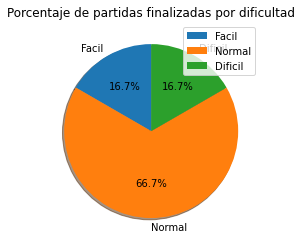

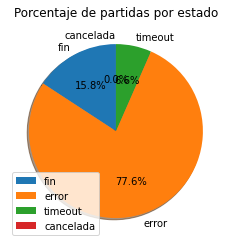

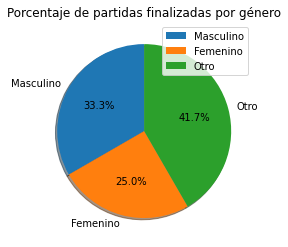

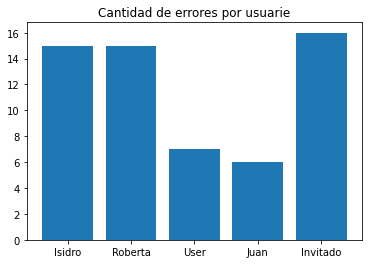

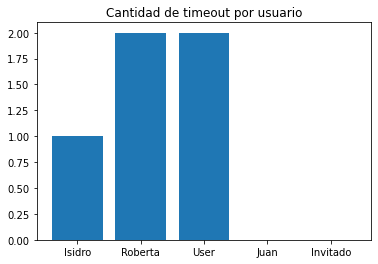

In [67]:
level_graphic()
partidas_estado()
porcentaje_finalizado_genero()
cant_errores()
cant_timeout()